## Library import and version checking

In [1]:
import pandas as pd
from alts import check_version, alts_load, alts_plot, alts_filter

pd.set_option('display.float_format', '{:.5f}'.format)
check_version.print_requirement()
check_version.print_versions()


#########  
Please ensure you have the following versions installed:
Pandas version: 1.5.2
NumPy version: 1.24.1
tkinter version: 8.5
Matplotlib version: 3.6.2
Seaborn version: 0.12.1
Bokeh version: 3.0.3

To install these versions, you can use the following commands:
pip install pandas==1.5.2
pip install numpy==1.24.1
pip install matplotlib==3.6.2
pip install seaborn==0.12.1
pip install bokeh==3.0.3

#########  

Python Version: 3.9.6 (default, Feb  3 2024, 15:58:27) 
[Clang 15.0.0 (clang-1500.3.9.4)]

Pandas version: 1.5.2
NumPy version: 1.24.1
tkinter version: 8.5
Seaborn version: 0.12.1
Bokeh version: 3.0.3


## Load csv for A-tag data (atag=1 for 1 A-tag and atag=2 for 2 A-tag)

In [2]:
# dff = alts_load.alts_analysis(atag=1) # For 1 A-tag
dff, dfr = alts_load.alts_analysis(atag=2) #For 2 A-tags

#------         FRONT data loading completed    ------#
#------         REAR data loading completed     ------#
#------ FRONT and REAR Pulse Interval Completed ------#


In [3]:
dff.head(10)

,datetime,time,SPL1,SPL2,td,SPLR,datetime_next,PulseInterval
0,2022-05-20 07:56:38.104000000,28598.10400,202.00200,39.32100,0,5.13725,2022-05-20 07:56:42.311999744,4.20800
1,2022-05-20 07:56:42.311999744,28602.31200,330.75900,59.36700,0,5.57143,2022-05-20 07:56:42.313000192,0.00100
2,2022-05-20 07:56:42.313000192,28602.31300,231.30000,138.00900,0,1.67598,2022-05-20 07:56:42.359500032,0.04650
3,2022-05-20 07:56:42.359500032,28602.35950,178.10100,57.05400,0,3.12162,2022-05-20 07:56:42.393000192,0.03350
4,2022-05-20 07:56:42.393000192,28602.39300,185.04000,52.42800,0,3.52941,2022-05-20 07:56:42.394499840,0.00150
5,2022-05-20 07:56:42.394499840,28602.39450,191.20800,43.17600,0,4.42857,2022-05-20 07:56:42.398499840,0.00400
6,2022-05-20 07:56:42.398499840,28602.39850,165.76500,15.42000,0,10.75000,2022-05-20 07:56:42.399499776,0.00100
7,2022-05-20 07:56:42.399499776,28602.39950,256.74300,40.09200,0,6.40385,2022-05-20 07:56:42.400000000,0.00050
8,2022-05-20 07:56:42.400000000,28602.40000,314.56800,57.05400,0,5.51351,2022-05-20 07:56:42.400499712,0.00050
9,2022-05-20 07:56:42.400499712,28602.40050,606.77700,58.59600,0,10.35526,2022-05-20 07:56:42.401500160,0.00100


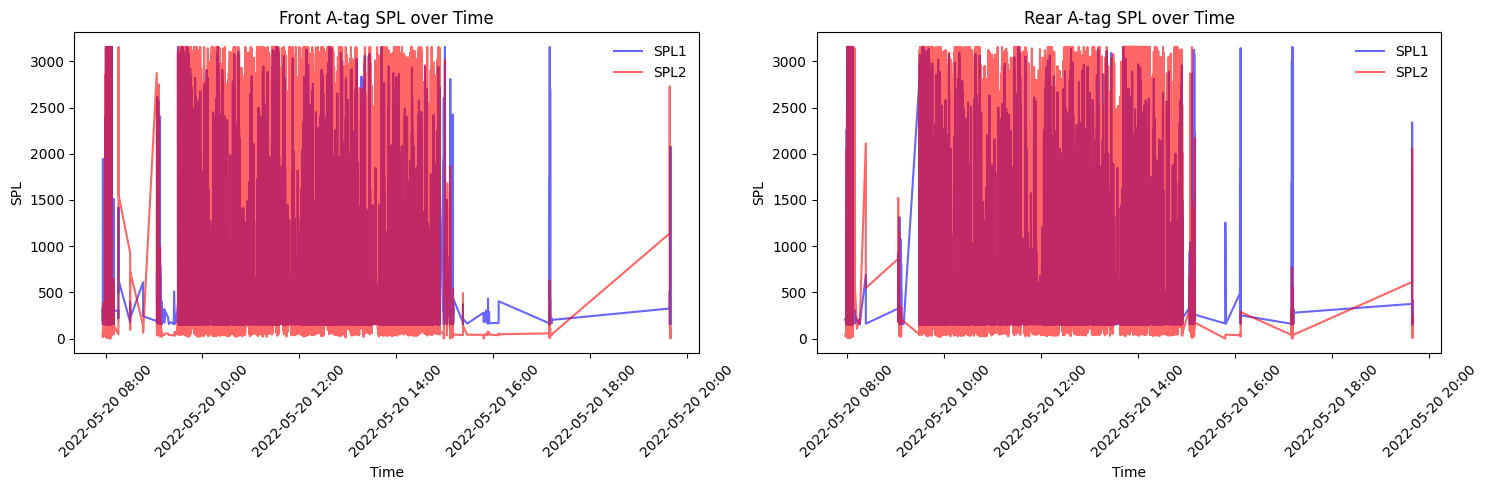

In [4]:
alts_plot.spl_time_plot(dff, dfr)

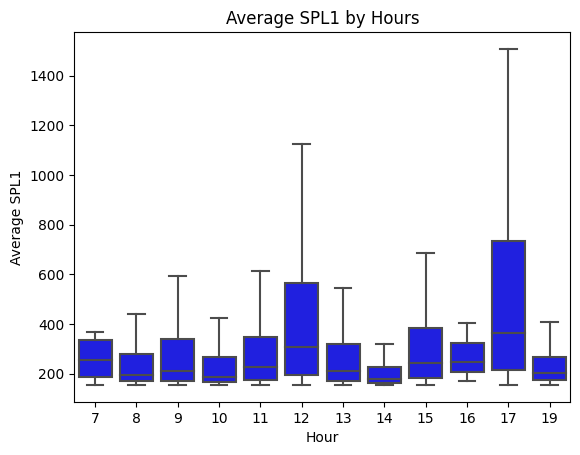

In [5]:
alts_plot.spl_time_distribution_plot(dff)

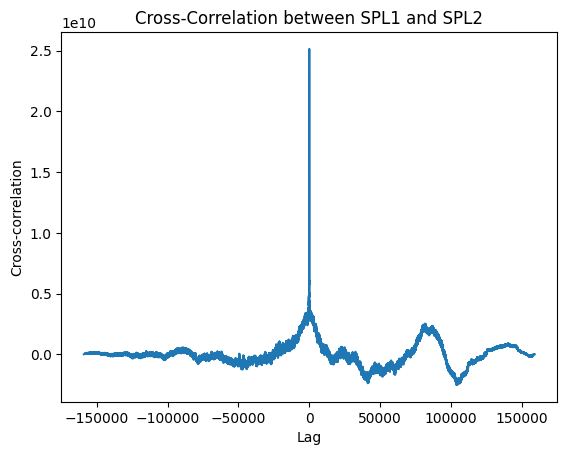

In [6]:
alts_plot.spl_cross_corr(dff)

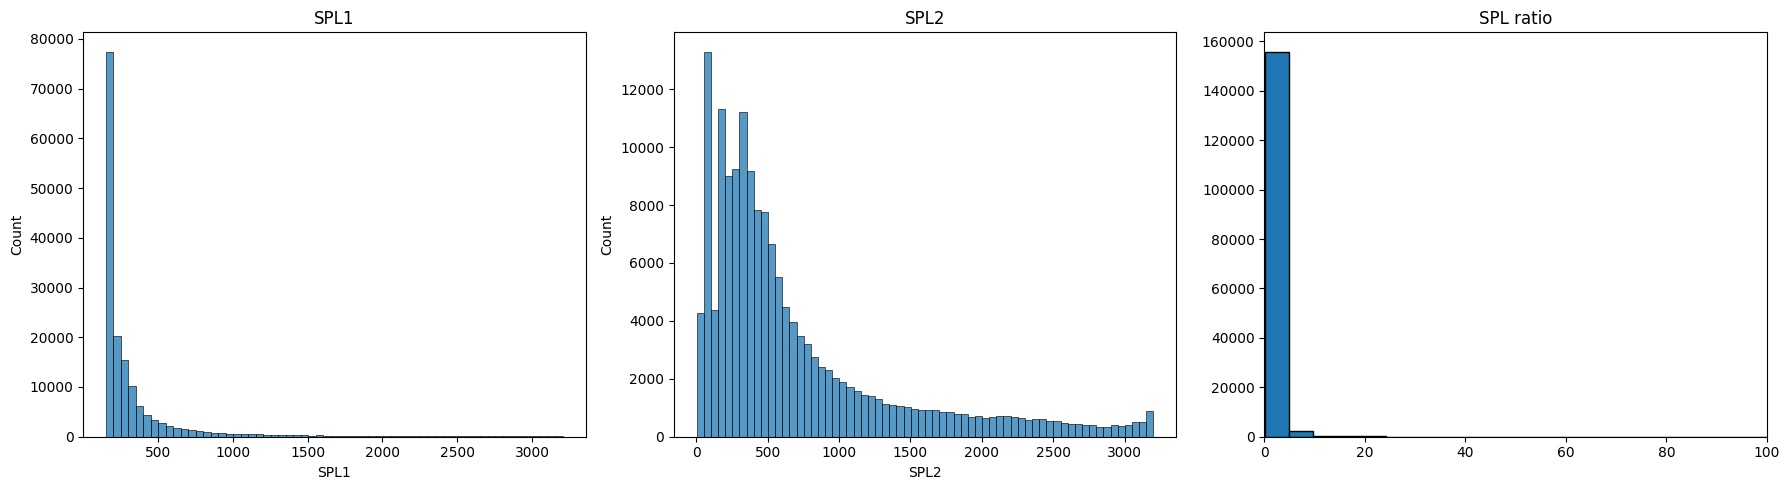

In [9]:
alts_plot.spl_distribution_plot(dff, xlim_SPLR=(0, 5), binwidth_SPLR=0.5)

## Analysis Visualisation

In [5]:
alts_plot.plot_alts_result(dff=dff, dfr=dfr, time_diff=0, atag=2)

In [ ]:
# SPLthreshold, tdswitch, Reflection, Isolation, smoothwin, smoothSPL = alts_filter.filter_condition(noise_condition=2)
# dff = alts_filter.cleanup(dff, pos='front')
# dfr = alts_filter.cleanup(dfr, pos='rear')

In [10]:
noise_condition = '2'  # Change as needed
dff_cleaned = alts_filter.cleanup(dff, noise_condition)

Recommended for most cases with a mild filter
----------PULSE BY PULSE FILTERING----------
###--- 0th screening ---###
Exclude clicks without source direction information (td=+511 excluded)
Total number of pulses: 159226  ; remained after excluding time difference filter: 111540

###--- 1st screening ---###
Select clicks with sound pressure >= 43 counts. 1 count = 0.077 Pa approximately
Eliminated possible reflections associated within 0.5 ms after the previous pulse
Total number of pulses: 111540  ; remained after threshold and reflection filter: 95831

###--- 2nd screening ---###
Eliminated isolated pulses 1000.0 ms apart from both sides pulses
Total number of pulses: 95831  ; remained after isolated pulse filter: 87628

###--- 3rd screening ---###
Select clicks with smoothly changed inter-pulse intervals with R=< 3
where R=(IPI present)/(IPI previous).   Accept  1/smoothIPI < R < smoothIPI
Total number of pulses: 87628  ; remained after smoothing IPI: 37782

###--- 4th screening ---

In [11]:
dfr_cleaned = alts_filter.cleanup(dfr, noise_condition)

Recommended for most cases with a mild filter
----------PULSE BY PULSE FILTERING----------
###--- 0th screening ---###
Exclude clicks without source direction information (td=+511 excluded)
Total number of pulses: 166968  ; remained after excluding time difference filter: 87230

###--- 1st screening ---###
Select clicks with sound pressure >= 43 counts. 1 count = 0.077 Pa approximately
Eliminated possible reflections associated within 0.5 ms after the previous pulse
Total number of pulses: 87230  ; remained after threshold and reflection filter: 78777

###--- 2nd screening ---###
Eliminated isolated pulses 1000.0 ms apart from both sides pulses
Total number of pulses: 78777  ; remained after isolated pulse filter: 71482

###--- 3rd screening ---###
Select clicks with smoothly changed inter-pulse intervals with R=< 3
where R=(IPI present)/(IPI previous).   Accept  1/smoothIPI < R < smoothIPI
Total number of pulses: 71482  ; remained after smoothing IPI: 29461

###--- 4th screening ---##

In [12]:
alts_plot.plot_alts_result(dff=dff_cleaned, dfr=dfr_cleaned, time_diff=0, atag=2)